# ADS 509 Sentiment Assignment

This notebook holds the Sentiment Assignment for Module 6 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In a previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we apply sentiment analysis to those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [24]:
import os
import re
import emoji
import pandas as pd
import numpy as np
import random
import string

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

sw = stopwords.words("english")

In [25]:
# Add any additional import statements you need here




In [26]:
# change `data_location` to the location of the folder on your machine.
data_location = "C:/Users/annie/M1 Results/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

positive_words_file = "positive-words.txt"
negative_words_file = "negative-words.txt"
tidy_text_file = "tidytext_sentiments.txt"

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A Pandas data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [27]:
# Read in the lyrics data
lyrics_data = defaultdict(dict)

for item in os.listdir(data_location + lyrics_folder):
    if os.path.isdir(data_location + lyrics_folder + item):
        for lyrics_page in os.listdir(data_location + lyrics_folder + item):
            artist,song = lyrics_page.split("_")
            song = song.replace(".txt", "")
            lyrics_data[item][song] = open(data_location + lyrics_folder + item + "/" + lyrics_page).read()

In [28]:
# Read in the twitter data
twitter_files = os.listdir(data_location + twitter_folder)
desc_files = [f for f in twitter_files if "followers_data" in f]

twitter_data = defaultdict(list)

for f in desc_files :
    artist = f.split("_")[0]
        
    with open(data_location + twitter_folder + f,'r', encoding='utf8') as infile :
        next(infile)
        for idx, line in enumerate(infile.readlines()) :
            
            line = line.strip().split("\t")
            
            if len(line) == 7 :
                twitter_data[artist].append(line[6])

In [36]:
# Read in the positive and negative words and the
# tidytext sentiment. Store these so that the positive
# words are associated with a score of +1 and negative words
# are associated with a score of -1. You can use a dataframe or a 
# dictionary for this.

positive_words = {}
negative_words = {}

with open(data_location + positive_words_file, 'r') as file:
    for word in file:
        positive_words[word.strip()] = 1

with open(data_location + negative_words_file, 'r') as file:
    for word in file:
        negative_words[word.strip()] = -1

## Sentiment Analysis on Songs

In this section, score the sentiment for all the songs for both artists in your data set. Score the sentiment by manually calculating the sentiment using the combined lexicons provided in this repository. 

After you have calculated these sentiments, answer the questions at the end of this section.


In [38]:
# your code here

# Calculate sentiment scores for Cher's songs
cher_sentiments = {}
for song, lyrics in lyrics_data['cher'].items():
    words = lyrics.lower().split()
    sentiment_score = sum(positive_words.get(word, 0) + negative_words.get(word, 0) for word in words)
    cher_sentiments[song] = sentiment_score

# Calculate sentiment scores for Robyn's songs
robyn_sentiments = {}
for song, lyrics in lyrics_data['robyn'].items():
    words = lyrics.lower().split()
    sentiment_score = sum(positive_words.get(word, 0) + negative_words.get(word, 0) for word in words)
    robyn_sentiments[song] = sentiment_score

In [43]:
# Create a DataFrame for Cher's songs and sort by sentiment score
cher_df = pd.DataFrame(cher_sentiments.items(), columns=['Song', 'Sentiment'])
cher_df['Artist'] = 'Cher'
cher_df = cher_df.sort_values(by='Sentiment', ascending=False)

# Create a DataFrame for Robyn's songs and sort by sentiment score
robyn_df = pd.DataFrame(robyn_sentiments.items(), columns=['Song', 'Sentiment'])
robyn_df['Artist'] = 'Robyn'
robyn_df = robyn_df.sort_values(by='Sentiment', ascending=False)

print(cher_df)
print(robyn_df)

                        Song  Sentiment Artist
198               perfection         41   Cher
155     loveandunderstanding         41   Cher
181                   mylove         34   Cher
236             strongenough         33   Cher
284              wasntitgood         27   Cher
..                       ...        ...    ...
139                    julie        -14   Cher
211                  runaway        -15   Cher
63             dressedtokill        -16   Cher
196               outrageous        -20   Cher
133  iwalkonguildedsplinters        -24   Cher

[316 rows x 3 columns]
                               Song  Sentiment Artist
64                       loveisfree         91  Robyn
51                   indestructible         26  Robyn
97          ushouldknowbetter114529         25  Robyn
96                ushouldknowbetter         25  Robyn
52    indestructibleacousticversion         24  Robyn
..                              ...        ...    ...
38                getmyselftogethe

### Questions

Q: Overall, which artist has the higher average sentiment per song? 

A: Robyn has the higher average sentiment per song, which is an average sentiment of 91. 

---

Q: For your first artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: The three songs that has the highest sentiments are 'perfection', 'my love' and 'love and understanding'; while the three songs that has the lowest sentiments are 'i Walk on guilded splinters', 'outrageous' and 'dress to kill'. The sentiment score is probably driven by the words used in the song title. For example, more positive vocabularies like 'love', 'understanding' scores higher while more negative vocabularies like 'kill' score lower.  

---

Q: For your second artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: The three songs that has the highest sentiments are 'love is free', 'indestructible' and 'u should know better'; while the three songs that has the lowest sentiments are 'don't fucking tell me what to do', 'criminal intent' and 'crash and burn girl'. The sentiment score is probably driven by the words used in the song title. For example, more positive vocabularies liike 'love', 'better' scores higher while more negative vocabularies like 'criminal' score lower.  

---

Q: Plot the distributions of the sentiment scores for both artists. You can use `seaborn` to plot densities or plot histograms in matplotlib.

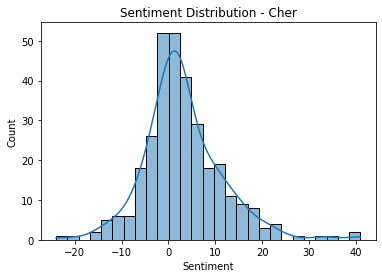

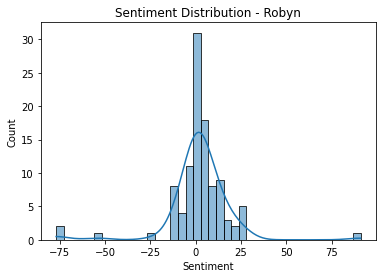

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution for Cher
sns.histplot(data=cher_df, x='Sentiment', kde=True)
plt.title('Sentiment Distribution - Cher')
plt.show()

# Plot distribution for Robyn
sns.histplot(data=robyn_df, x='Sentiment', kde=True)
plt.title('Sentiment Distribution - Robyn')
plt.show()

## Sentiment Analysis on Twitter Descriptions

In this section, define two sets of emojis you designate as positive and negative. Make sure to have at least 10 emojis per set. You can learn about the most popular emojis on Twitter at [the emojitracker](https://emojitracker.com/). 

Associate your positive emojis with a score of +1, negative with -1. Score the average sentiment of your two artists based on the Twitter descriptions of their followers. The average sentiment can just be the total score divided by number of followers. You do not need to calculate sentiment on non-emoji content for this section.

In [45]:
# your code here

# Define two sets of emojis you designate as positive and negative
positive_emojis = {'😃': 1, '🥰': 1, '👍': 1, '❤️': 1, '🙌': 1, '😊': 1, '🎉': 1, '💪': 1, '🌟': 1, '🤩': 1}
negative_emojis = {'😔': -1, '😞': -1, '👎': -1, '💔': -1, '😢': -1, '😡': -1, '😠': -1, '🤬': -1, '😣': -1, '😒': -1}

In [47]:
# Average sentiment of Cher
cher_sentiment_score = 0
cher_follower_count = 0

for description in twitter_data['cher']:
    emoji_sentiments = [positive_emojis.get(emoji, 0) for emoji in description]
    sentiment_score = sum(emoji_sentiments)
    cher_sentiment_score += sentiment_score
    cher_follower_count += 1
    
# The average sentiment can just be the total score divided by number of followers
cher_average_sentiment = cher_sentiment_score / cher_follower_count

In [54]:
# Average sentiment of Robyn
robyn_sentiment_score = 0
robyn_follower_count = 0

for description in twitter_data['robynkonichiwa']:
    emoji_sentiments = [positive_emojis.get(emoji, 0) for emoji in description]
    sentiment_score = sum(emoji_sentiments)
    robyn_sentiment_score += sentiment_score
    robyn_follower_count += 1
    
# The average sentiment can just be the total score divided by the number of followers
robyn_average_sentiment = robyn_sentiment_score / robyn_follower_count

In [55]:
print("Cher Average Sentiment:", cher_average_sentiment)
print("Robyn Average Sentiment:", robyn_average_sentiment)

Cher Average Sentiment: 0.011999960021788126
Robyn Average Sentiment: 0.005988433587850531


In [56]:
# Count the frequency of positive and negative emojis for Cher
cher_positive_count = Counter([emoji for description in twitter_data['cher'] for emoji in description if emoji in positive_emojis])
cher_negative_count = Counter([emoji for description in twitter_data['cher'] for emoji in description if emoji in negative_emojis])

# Count the frequency of positive and negative emojis for Robyn
robyn_positive_count = Counter([emoji for description in twitter_data['robynkonichiwa'] for emoji in description if emoji in positive_emojis])
robyn_negative_count = Counter([emoji for description in twitter_data['robynkonichiwa'] for emoji in description if emoji in negative_emojis])

# Find the most popular positive and negative emojis for Cher
cher_most_positive_emoji = cher_positive_count.most_common(1)[0][0]
cher_most_negative_emoji = cher_negative_count.most_common(1)[0][0]

# Find the most popular positive and negative emojis for Robyn
robyn_most_positive_emoji = robyn_positive_count.most_common(1)[0][0]
robyn_most_negative_emoji = robyn_negative_count.most_common(1)[0][0]

print("Cher's Most Popular Positive Emoji:", cher_most_positive_emoji)
print("Cher's Most Popular Negative Emoji:", cher_most_negative_emoji)
print("Robyn's Most Popular Positive Emoji:", robyn_most_positive_emoji)
print("Robyn's Most Popular Negative Emoji:", robyn_most_negative_emoji)

Cher's Most Popular Positive Emoji: 😊
Cher's Most Popular Negative Emoji: 💔
Robyn's Most Popular Positive Emoji: 💪
Robyn's Most Popular Negative Emoji: 💔


Q: What is the average sentiment of your two artists? 

A: The average sentiment of the two artists is 0.011999960021788126 for Cher and 0.005988433587850531 for Robyn.

---

Q: Which positive emoji is the most popular for each artist? Which negative emoji? 

A: The most popular positive emoji for Cher is 😊, and the most popular positive emoji for Robyn is 💪. The most popular negative emoji for both Cher and Robyn is 💔.